# Symetric Double Pendulum

### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
#from quickplot import QuickPlot
#import quickplot
#quickplot.__version__

## Equations of motion

The hamiltonian of the symmetric ($R_1=R_2=R, m_1=m_2=m$) double pendulum in gravity reads

$\tilde{H}=p_1^2+\frac{1}{2}p_2^2-p_1p_2\sin{\left(q_1-q_2\right)}+\lambda\left(2\sin{q_1}+\sin{q_2}\right)$ with $q_i=\phi_i$ and $p_i=\dot{\phi_i}$

whith the parameter $\lambda=\frac{g}{R}$

thus the equations of motion are given by

$\dot{q_1}=\frac{\partial \tilde{H}}{\partial p_1} = 2p_1 - p_2\sin{\left(q_1-q_2\right)}$

$\dot{q_2}=\frac{\partial \tilde{H}}{\partial p_2} = p_2 - p_1\sin{\left(q_1-q_2\right)}$

$\dot{p_1}=-\frac{\partial \tilde{H}}{\partial q_1} = -2\lambda\cos{q_1}- p_1p_2\cos{\left(q_1-q_2\right)}$

$\dot{p_2}=-\frac{\partial \tilde{H}}{\partial q_2} = -\lambda\cos{q_2} + p_1p_2\cos{\left(q_1-q_2\right)}$

## Constants of motion

As the Hamiltonian is not explicitly depending on the time, the energy is a constant of motion and the phase space reduces to three dimensions e.g. ($q_1$, $p_1$, $q_2$)

$E = \tilde{H} = p_1^2+\frac{1}{2}p_2^2-p_1p_2\sin{\left(q_1-q_2\right)}+\lambda\left(2\sin{q_1}+\sin{q_2}\right)$

## Recursive formulation of discrete dynamics

The equations of motion can be discretized and integrated and yield the following discrete maps

$q_1^{(n+1)}=q_1^{(n)}+\Delta t \left(2p_1-p_2\sin{\left(q_1-q_2\right)}\right)$

$q_2^{(n+1)}=q_2^{(n)}+\Delta t\left(p_2 - p_1\sin{\left(q_1-q_2\right)}\right)$

$p_1^{(n+1)}=p_1^{(n)}-\Delta t \left(2\lambda\cos{q_1^{(n)}}+ p_1^{(n)}p_2^{(n)}\cos{\left(q_1^{(n)}-q_2^{(n)}\right)}\right)$

$p_2^{(n+1)}=p_2^{(n)}-\Delta t \left(\lambda\cos{q_2^{(n)}}- p_1^{(n)}p_2^{(n)}\cos{\left(q_1^{(n)}-q_2^{(n)}\right)}\right)$

In [127]:
class DoublePendulum(object):
    def __init__(self, l=10, q1_0=np.pi/4, q2_0=np.pi/4, p1_0=0, p2_0=0, dt=0.001):
        self.l = l
        self.E = self.energy(q1_0, q2_0, p1_0, p2_0)
        self.q1, self.q2, self.p1, self.p2 = q1_0, q2_0, p1_0, p2_0
        self.dt = dt

    def energy(self, q1, q2, p1, p2):
        return p1**2+0.5*p2**2+self.l*(2*np.sin(q1)+np.sin(q2))

    def q2_(self, q1, p1, p2):
        return np.arcsin((E-p1**2-0.5*p2**2)/l-2*np.sin(q1))

    def update1(self):
        q1, q2, p1, p2 = self.q1, self.q2, self.p1, self.p2
        sinq1q2 = np.sin(q1-q2)
        cosq1q2 = np.cos(q1-q2)
        q1n = q1 + self.dt*(2*p1-p2*sinq1q2)
        q2n = q2 + self.dt*(p2-p1*sinq1q2)
        p1n = p1 - self.dt*(2*self.l*np.cos(q1)+p1*p2*cosq1q2)
        p2n = p2 - self.dt*(self.l*np.cos(q2)+p1*p2*cosq1q2)
        self.q1, self.q2, self.p1, self.p2 = q1n, q2n, p1n, p2n
    
    def __repr__(self):
        return str({
            'q1':self.q1,
            'q2':self.q2,
            'p1':self.p1,
            'p2':self.p2,
               })

## Coordinates

The coordinates of the pendulum can be extracted by

$x_1 = \cos{q_1}$

$y_1 = \sin{q_1}$

$x_2 = x_1 + \cos{q_2}$

$y_2 = y_1 + \sin{q_2}$

In [128]:
def coords(q1, q2):
    x1, y1 = np.cos(q1), np.sin(q1), 
    return x1, y1, x1 + np.cos(q2), y1 + np.sin(q2)

## Animation of the pendulum

In [129]:
def draw_pendulum(q1, q2, ax):
    x1, y1, x2, y2 = coords(q1, q2)
    l1, = ax.plot([0,x1],[0,y1], marker='o')
    l2, = ax.plot([x1,x2],[y1,y2], marker='o')
    return l1, l2

In [130]:
def update_pendulum(q1, q2):
    x1, y1, x2, y2 = coords(q1, q2)
    l1.set_data([0,x1], [0,y1])
    l2.set_data([x1,x2], [y1,y2])
    x, y = points.get_data()
    points.set_data(x +[x2],y +[y2])
    return l1, l2, points

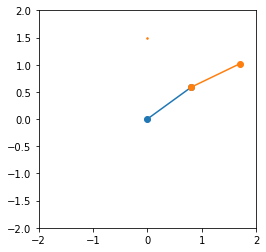

In [131]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))

points, = ax.plot([0],[1.5], marker='.', linestyle='', color=l2.get_color(), markersize=3)
l1, l2 = draw_pendulum(np.pi/5, np.pi/7, ax)

In [132]:
# initialization function: plot the background of each frame
def init2():
    l1.set_data([], [])
    l2.set_data([], [])
    points.set_data([],[])
    
    #d['q1'], d['q2'] = np.pi/5, -np.pi/7
    #d['p1'], d['p2'] = np.pi/40, np.pi/13
    
    return (l1, l2, points,)

In [133]:
# animation function. This is called sequentially
def animate2(i):
    for j in range(10):
        pen.update1()
    l1, l2, points = update_pendulum(pen.q1, pen.q2)
    return (l1, l2, points,)

In [142]:
# call the animator. blit=True means only re-draw the parts that have changed.
pen = DoublePendulum(l=1,p1_0=0,p2_0=0)
anim = animation.FuncAnimation(fig, animate2, init_func=init2, frames=1000, interval=20, blit=True)

In [143]:
HTML(anim.to_html5_video())

## Illustration

In [ ]:
# initialization function: plot the background of each frame
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    points.set_data([],[])
    return (l1, l2, points,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    q1 = +i*np.pi/50
    q2 = -i*np.pi/33
    l1, l2, points = update_pendulum(q1, q2)
    return (l1, l2, points,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())